Dla dobrego modelu AI kluczowe są dane i ich jakość. Dlatego w tym notebooku zaczniemy od EDA. 

Żródło danych: https://www.kaggle.com/datasets/usamabuttar/world-happiness-report-2005-present

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Na początek wczytamy sobie dane z Digital Ocean do zmiennej:

In [2]:
dig_ocean_url = 'https://projectpiob.fra1.digitaloceanspaces.com/projectpiob/whr_05-22/WHR_05-22.csv'
whr_raw_df = pd.read_csv(dig_ocean_url)

Następnie zrobimy sobie podstawowy przegląd danych, aby lepiej je zrozumieć:

In [3]:
whr_raw_df.head(3)

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357


In [4]:
whr_raw_df.sample(10)

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
1166,Luxembourg,Western Europe,2022,7.227935,11.659949,0.877917,71.675003,0.915110,0.023950,0.345176,0.718450,0.218084,NaN
1820,Sri Lanka,South Asia,2013,4.364694,9.342610,0.809175,65.639999,0.834020,0.262438,0.842014,0.775874,0.208130,0.750018
2015,Uganda,Sub-Saharan Africa,2015,4.237687,7.653903,0.746633,56.299999,0.757835,0.131468,0.872740,0.678660,0.352848,0.604115
642,France,Western Europe,2010,6.797901,10.648888,0.942955,71.199997,0.849702,-0.107351,0.622954,0.728971,0.260568,0.401466
1065,Kyrgyzstan,Commonwealth of Independent States,2013,5.402427,8.440616,0.850716,62.860001,0.755037,-0.087396,0.899560,0.595424,0.134911,0.435920
131,Bahrain,Middle East and North Africa,2020,6.173176,10.775782,0.847745,65.824997,0.945233,0.117025,NaN,0.729510,0.296835,NaN
1112,Lebanon,Middle East and North Africa,2017,5.153990,9.787407,0.776583,65.849998,0.604554,-0.085262,0.910727,0.469469,0.243549,0.217718
1908,Tajikistan,Commonwealth of Independent States,2014,4.896158,7.957960,0.809826,61.299999,0.852732,-0.003727,0.698431,0.586819,0.196154,0.830833
734,Greece,Western Europe,2019,5.952157,10.299629,0.890810,70.900002,0.613584,-0.291156,0.848004,0.559758,0.235946,0.396425
1699,Sierra Leone,Sub-Saharan Africa,2010,4.133956,7.245351,0.811873,47.799999,0.726269,0.011262,0.910441,0.497324,0.290469,0.651548


Jak widać df pokazuje nam charakterystyki różnych krajów w różnych latach. Aby ułatwić sobie życie, skorzystamy z ydata-profiling, aby wygenerować wstępny raport EDA:

In [5]:
from ydata_profiling import ProfileReport

In [6]:
whr_ydata_report = ProfileReport(whr_raw_df, title="Analiza danych z whr 2005-2022") 
whr_ydata_report.to_file("whr_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 68.26it/s]
c:\Users\piobpc\miniconda3\envs\whr\lib\site-packages\ydata_profiling\model\correlations.py:87: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'putmask: first argument must be an array')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Wnioski z raportu:
1. Poszczególne kolumny nie mają za dużego współczynnika % brakujących wartości, generalnie poniżej 5.3% per kolumna.
2. Wyjątkiem jest kolumna "Confidence In National Government", która posiada aż 16.4% brakujących wartości. 
3. Dodatkowym "problemem" jaki wskazuje ydata-profiling jest unikatowość kolumny "Life Ladder" (każda wartość jest unikatowa). Wynika to jednak z tego, że w tej kolumnie mamy wyniki dla poziomu szczęścia. W kolejnym kroku zmienimy nazwę na "Happiness Score", aby nam się nie myliło z innym konceptem oraz wygładzimy nazwy pozostałych kolumn. 

Oczywiście dobrą praktyką jest zrobienie kopii oryginalnego data frame (df)

In [8]:
whr_processed_df = whr_raw_df.copy()

In [9]:
whr_processed_df.columns=['Country', 'Region', 'Year', 'Happiness Score', 'GDP per cap', 'Social Support', 'Healthy Life Expectence', 'Life Choices Freedom', 'Generosity', 'Corruption Perception', 'Pos Affect', 'Neg Affect', 'Gov Belief']
# pokaże nam ładnie podmienione nazwy kolumn, dużo czytelniejsze i intuicyjne

In [10]:
whr_processed_df.sample(5)

,Country,Region,Year,Happiness Score,GDP per cap,Social Support,Healthy Life Expectence,Life Choices Freedom,Generosity,Corruption Perception,Pos Affect,Neg Affect,Gov Belief
185,Benin,Sub-Saharan Africa,2013,3.479413,7.934523,0.576823,53.779999,0.783240,-0.084524,0.855956,0.645734,0.216339,0.546921
1696,Sierra Leone,Sub-Saharan Africa,2006,3.628185,7.134283,0.561356,46.279999,0.679001,0.099506,0.836166,0.534737,0.380655,0.541412
645,France,Western Europe,2013,6.667121,10.664618,0.907691,71.500000,0.877796,-0.128366,0.699069,0.741086,0.204970,0.395131
2136,Venezuela,Latin America and Caribbean,2021,5.107553,NaN,0.812418,64.050003,0.595620,NaN,0.823898,0.697587,0.389351,0.175912
157,Belarus,Commonwealth of Independent States,2014,5.812401,9.858456,0.880259,64.540001,0.647185,-0.051937,0.681509,0.575067,0.208536,0.507747


Teraz pora zaadresować wartości brakujące.  Dla kolumn, które mają brakujące dane w granicach < 5.3% zastosujemy imputację. Dla kolumny "Gov Belief" rozważymy albo jej całkowite usunięcie albo próbę uzupełnienia również poprzez imputację. W obu przypadkach rodzajem imputacji będzie interpolacja, gdyż mamy do czynienia z szeregiem czasowym (2005-2022), więc to pozwoli nam w miarę odwzorować wartości, które mogłyby się pojawić, a z jakichś powodów ich nie ma

In [11]:
whr_processed_df[whr_processed_df['Gov Belief'].isnull()].sample(5)

,Country,Region,Year,Happiness Score,GDP per cap,Social Support,Healthy Life Expectence,Life Choices Freedom,Generosity,Corruption Perception,Pos Affect,Neg Affect,Gov Belief
1049,Kuwait,Middle East and North Africa,2010,6.798151,10.998427,0.892722,69.199997,0.703020,-0.037051,0.486111,0.686744,0.203396,NaN
124,Bahrain,Middle East and North Africa,2012,5.027187,10.774646,0.911350,65.480003,0.681823,NaN,0.437915,0.559416,0.380815,NaN
442,Congo (Kinshasa),NaN,2022,3.207197,7.006671,0.654081,55.375000,0.664101,0.085998,0.835641,0.563382,0.461423,NaN
1659,Saudi Arabia,Middle East and North Africa,2017,6.294282,10.731941,0.840086,63.599998,0.814142,-0.133074,NaN,0.702725,0.305842,NaN
2001,Turkmenistan,Commonwealth of Independent States,2015,5.791460,9.436702,0.960158,61.700001,0.701358,0.092152,NaN,0.633318,0.301039,NaN


Sprawdzimy sobie jeszcze korelację zmiennych, aby sprawdzić co wpływa na siebie najmocniej, w tym celu usuniemy kolumny ze stringami i utworzymy nowy numeryczny df:

In [12]:
whr_number_df = whr_processed_df.drop(columns=['Country','Region'])

In [13]:
whr_number_df.corr()

,Year,Happiness Score,GDP per cap,Social Support,Healthy Life Expectence,Life Choices Freedom,Generosity,Corruption Perception,Pos Affect,Neg Affect,Gov Belief
Year,1.000000,0.045943,0.077772,-0.029750,0.163500,0.234105,0.005726,-0.081358,0.019182,0.205369,0.012638
Happiness Score,0.045943,1.000000,0.784871,0.721663,0.713493,0.534532,0.181658,-0.431569,0.518207,-0.339992,-0.081887
GDP per cap,0.077772,0.784871,1.000000,0.683619,0.818126,0.367560,-0.000800,-0.352884,0.237986,-0.247560,-0.188351
Social Support,-0.029750,0.721663,0.683619,1.000000,0.597682,0.409439,0.068593,-0.222584,0.431139,-0.441800,-0.169573
Healthy Life Expectence,0.163500,0.713493,0.818126,0.597682,1.000000,0.373448,0.010876,-0.299055,0.223119,-0.140726,-0.178003
Life Choices Freedom,0.234105,0.534532,0.367560,0.409439,0.373448,1.000000,0.325107,-0.476537,0.578752,-0.275470,0.408533
Generosity,0.005726,0.181658,-0.000800,0.068593,0.010876,0.325107,1.000000,-0.279494,0.307140,-0.080837,0.294399
Corruption Perception,-0.081358,-0.431569,-0.352884,-0.222584,-0.299055,-0.476537,-0.279494,1.000000,-0.280620,0.266267,-0.460789
Pos Affect,0.019182,0.518207,0.237986,0.431139,0.223119,0.578752,0.307140,-0.280620,1.000000,-0.330236,0.123241
Neg Affect,0.205369,-0.339992,-0.247560,-0.441800,-0.140726,-0.275470,-0.080837,0.266267,-0.330236,1.000000,-0.125631


Wnioski: na poziom szczęścia 'Happiness Score' najmocniej wpływają takie czynniki jak: GDP per capita, Social Support, Healthy Life Expectance (powyżej 0.70), nieco słabiej ale nadal: Life Choice Freedom (ok. 0.53) oraz Corruption Perception (-0.43). Z uwagi na to, że dla nas problematyczne była kolumna 'Gov Belief', która i tak ma ma niską korelację z 'Happiness Score', a także nie jest istotny humor respondentów w momencie wypełnienia ankiety (Pos i Neg Affect), również bardzo mały wpływ 'Generosity', można by te kolumny usunąć. Ale póki co usuniemy tylko Pos i Neg Affect, bo to są krótkoterminowe dane oparte humorze respondentów w dniu przed odpowiedzią nieistotne dla naszej analizy.

In [14]:
whr_processed_df.drop(columns=['Pos Affect','Neg Affect'], inplace=True)

In [15]:
whr_processed_df.sample()

,Country,Region,Year,Happiness Score,GDP per cap,Social Support,Healthy Life Expectence,Life Choices Freedom,Generosity,Corruption Perception,Gov Belief
625,Finland,Western Europe,2010,7.393264,10.733668,0.935481,69.599998,0.916009,0.086896,0.412516,0.461844


Zabieramy się za interpolację. Oczywiście zanim naiesieniemy zmiany na df, robimy sobie jego kopię.

In [16]:
whr_processed_v2_df = whr_processed_df.copy()

In [17]:
whr_processed_v2_df = whr_processed_v2_df.interpolate()

C:\Users\piobpc\AppData\Local\Temp\ipykernel_10484\3169390696.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  whr_processed_v2_df = whr_processed_v2_df.interpolate()


In [18]:
whr_processed_v2_df.isnull().sum() 

Country                      0
Region                     112
Year                         0
Happiness Score              0
GDP per cap                  0
Social Support               0
Healthy Life Expectence      0
Life Choices Freedom         0
Generosity                   0
Corruption Perception        0
Gov Belief                   0
dtype: int64

Nie mamy już brakujących danych, poza kolumną region, która jest tekstowa (brakuje 112 regionów). Sprawdźmy w jakich wierszach brakuje regionu:

In [19]:
whr_processed_v2_df[whr_processed_v2_df['Region'].isnull()]

,Country,Region,Year,Happiness Score,GDP per cap,Social Support,Healthy Life Expectence,Life Choices Freedom,Generosity,Corruption Perception,Gov Belief
39,Angola,NaN,2011,5.589001,8.944346,0.723094,51.220001,0.583702,0.052619,0.911320,0.232387
40,Angola,NaN,2012,4.360250,8.988708,0.752593,51.840000,0.456029,-0.138630,0.906300,0.237091
41,Angola,NaN,2013,3.937107,8.999667,0.721591,52.459999,0.409555,-0.105992,0.816375,0.547732
42,Angola,NaN,2014,3.794838,9.009897,0.754615,53.080002,0.374542,-0.170031,0.834076,0.572346
179,Belize,NaN,2007,6.450644,9.191672,0.872267,64.300003,0.705306,0.008450,0.768984,0.255463
...,...,...,...,...,...,...,...,...,...,...,...
1991,Turkiye,NaN,2017,5.607262,10.224949,0.876468,68.050003,0.644434,-0.240131,0.670911,0.440255
1992,Turkiye,NaN,2018,5.185689,10.245586,0.847027,68.224998,0.528629,-0.179062,0.804879,0.449722
1993,Turkiye,NaN,2019,4.872074,10.245305,0.791656,68.400002,0.631084,-0.139380,0.760442,0.459188
1994,Turkiye,NaN,2020,4.861554,10.256719,0.856730,68.574997,0.510386,-0.117426,0.774417,0.468655


Te dane możemy łatwo wypełnić, mapując odpowiednio wg schematu, jaki kraj jest w którym regionie świata. 
Najpierw zaczniemy od tego, aby wylistować kraje, dla których brakuje wartości w kolumnie 'Region'.

In [20]:
unikalne = whr_processed_v2_df.loc[whr_processed_v2_df['Region'].isna(), 'Country'].unique()

In [21]:
unikalne

array(['Angola', 'Belize', 'Bhutan', 'Central African Republic',
       'Congo (Kinshasa)', 'Cuba', 'Czechia', 'Djibouti', 'Eswatini',
       'Guyana', 'Oman', 'Qatar', 'Somalia', 'Somaliland region',
       'South Sudan', 'State of Palestine', 'Sudan', 'Suriname', 'Syria',
       'Trinidad and Tobago', 'Turkiye'], dtype=object)

Mamy listę krajów, więc działamy z mapowaniem regionów. Najpierw wylistujemy sobie jakie mamy obszary w danych i potem zmapujemy je do tych krajów, które mają puste wartości.

In [22]:
whr_processed_v2_df['Region'].unique().tolist()

['South Asia',
 'Central and Eastern Europe',
 'Middle East and North Africa',
 nan,
 'Latin America and Caribbean',
 'Commonwealth of Independent States',
 'North America and ANZ',
 'Western Europe',
 'Sub-Saharan Africa',
 'Southeast Asia',
 'East Asia']

In [23]:
mapowanie = {
    'Angola':'Sub-Saharan Africa',
    'Belize':'Latin America and Caribbean',
    'Bhutan':'Southeast Asia',
    'Central African Republic':'Sub-Saharan Africa',
    'Congo (Kinshasa)':'Sub-Saharan Africa', 
    'Cuba':'Latin America and Caribbean',
    'Czechia':'Central and Eastern Europe',
    'Djibouti':'Sub-Saharan Africa',
    'Eswatini':'Sub-Saharan Africa', 
    'Guyana':'Latin America and Caribbean',
    'Oman':'Middle East and North Africa', 
    'Qatar':'Middle East and North Africa',  
    'Somalia':'Sub-Saharan Africa',
    'Somaliland region':'Sub-Saharan Africa',
    'South Sudan':'Sub-Saharan Africa', 
    'State of Palestine':'Middle East and North Africa',
    'Sudan':'Middle East and North Africa', 
    'Suriname':'Latin America and Caribbean',
    'Syria':'Middle East and North Africa',
    'Trinidad and Tobago':'Latin America and Caribbean', 
    'Turkiye':'Middle East and North Africa'
}

# Tylko tam gdzie kolumna 'Region' jest None
region_null = whr_processed_v2_df['Region'].isna()
# Mapowanie
whr_processed_v2_df.loc[region_null, 'Region'] = (whr_processed_v2_df.loc[region_null, 'Country'].map(mapowanie))

In [24]:
whr_processed_v2_df.isnull().sum() # Sprawdzamy uzupełnienie braków

Country                    0
Region                     0
Year                       0
Happiness Score            0
GDP per cap                0
Social Support             0
Healthy Life Expectence    0
Life Choices Freedom       0
Generosity                 0
Corruption Perception      0
Gov Belief                 0
dtype: int64

Wartości w kolumnie 'Region' uzupełnione! Nie mamy już pustych wartości, możemy kontynuować. Sprawdzimy teraz czy są jakieś outliersy. 

In [25]:
whr_processed_v3_df = whr_processed_v2_df.copy()

In [26]:
# Tylko kolumny numeryczne
whr_number_boxplot_df= whr_processed_v3_df.select_dtypes(include='number')

for col in whr_number_boxplot_df.columns:
    plt.figure(figsize=(5, 4))  # rozmiar jednego wykresu
    whr_processed_v3_df.boxplot(column=col)
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()
    plt.show()

C:\Users\piobpc\AppData\Local\Temp\ipykernel_10484\1102455491.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\piobpc\AppData\Local\Temp\ipykernel_10484\1102455491.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\piobpc\AppData\Local\Temp\ipykernel_10484\1102455491.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\piobpc\AppData\Local\Temp\ipykernel_10484\1102455491.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\piobpc\AppData\Local\Temp\ipykernel_10484\1102455491.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\piobpc\AppData\Local\Temp\ipykernel_10484\1102455491.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\piobpc\AppData\Local\Temp\ipykernel_10484\1102455491.py:9: Us

Mamy w wielu kolumnach sporo wartości odstających. Sprawdźmy jeszcze podstawowe statystyki

In [27]:
whr_processed_v3_df.describe()

,Year,Happiness Score,GDP per cap,Social Support,Healthy Life Expectence,Life Choices Freedom,Generosity,Corruption Perception,Gov Belief
count,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000
mean,2014.161437,5.479226,9.386318,0.810923,63.269250,0.748095,0.000485,0.741576,0.492943
std,4.718736,1.125529,1.155439,0.120724,6.862399,0.140098,0.159696,0.184469,0.192247
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.257534,-0.337527,0.035198,0.068769
25%,2010.000000,4.646750,8.494683,0.747512,59.200909,0.656992,-0.109398,0.682614,0.341739
50%,2014.000000,5.432437,9.497694,0.836042,64.959999,0.770135,-0.022637,0.796723,0.474625
75%,2018.000000,6.309460,10.373808,0.904686,68.344997,0.859515,0.091989,0.865765,0.628322
max,2022.000000,8.018934,11.663788,0.987343,74.474998,0.985178,0.702708,0.983276,0.993604


In [28]:
whr_processed_v3_df[whr_processed_v3_df['Corruption Perception']<0.5]

,Country,Region,Year,Happiness Score,GDP per cap,Social Support,Healthy Life Expectence,Life Choices Freedom,Generosity,Corruption Perception,Gov Belief
76,Australia,North America and ANZ,2005,7.340688,10.662058,0.967892,69.800003,0.934973,0.094554,0.390416,0.532063
78,Australia,North America and ANZ,2008,7.253757,10.709456,0.946635,70.040001,0.915733,0.301722,0.430811,0.644675
79,Australia,North America and ANZ,2010,7.450047,10.713649,0.954520,70.199997,0.932059,0.313121,0.366127,0.609753
80,Australia,North America and ANZ,2011,7.405616,10.723386,0.967029,70.279999,0.944586,0.365759,0.381772,0.530787
81,Australia,North America and ANZ,2012,7.195586,10.744205,0.944599,70.360001,0.935146,0.270048,0.368252,0.420419
...,...,...,...,...,...,...,...,...,...,...,...
2110,Uzbekistan,Commonwealth of Independent States,2012,6.019332,8.607552,0.933141,62.779999,0.913550,-0.043978,0.463375,0.942929
2111,Uzbekistan,Commonwealth of Independent States,2013,5.939986,8.662359,0.962781,63.020000,0.949540,-0.040500,0.433932,0.953268
2113,Uzbekistan,Commonwealth of Independent States,2015,5.972364,8.764228,0.968225,63.500000,0.979937,0.368485,0.470917,0.973944
2114,Uzbekistan,Commonwealth of Independent States,2016,5.892539,8.804467,0.945102,63.799999,0.983803,0.202085,0.467779,0.978045


Wnioski: Jak widać powyżej na przykładzie kolumny 'Corruption Perception' spora liczba outliers może wynikać z tego, że jest masa powtórzeń dla pewnych grupy krajów, których wartości wykraczają znacznie poza średnią statystyczną. Stąd zakładamy, że boxploty nie zaklasyfikowały tych wartości w ramach rozsądnego minimum czy maksimum. 

Zanim przejdziemy to tworzenia i trenowania modelu AI, musimy jeszcze dokonać walidacji typu danych dzięki Pandera. 

In [29]:
import pandera as pa

In [31]:
whr_processed_v3_df.head(1) # Aby sprawdzić jakie kolumny i typy danych mamy w df

,Country,Region,Year,Happiness Score,GDP per cap,Social Support,Healthy Life Expectence,Life Choices Freedom,Generosity,Corruption Perception,Gov Belief
0,Afghanistan,South Asia,2008,3.72359,7.350416,0.450662,50.5,0.718114,0.167652,0.881686,0.612072


In [32]:
schema = pa.DataFrameSchema(
    {
        'Country': pa.Column(str),
        'Region': pa.Column(str),
        'Year': pa.Column(int),
        'Happiness Score': pa.Column(float),
        'GDP per cap': pa.Column(float),
        'Social Support': pa.Column(float),
        'Healthy Life Expectence': pa.Column(float),
        'Life Choices Freedom': pa.Column(float),
        'Generosity': pa.Column(float),
        'Corruption Perception': pa.Column(float),
        'Gov Belief': pa.Column(float)
    })

try:
    schema.validate(whr_processed_v3_df, lazy=True)
except pa.errors.SchemaErrors as e:
    display(e.failure_cases)
    raise

c:\Users\piobpc\miniconda3\envs\whr\lib\site-packages\pandera\_pandas_deprecated.py:146: FutureWarning: Importing pandas-specific classes and functions from the
top-level pandera module will be **removed in a future version of pandera**.
If you're using pandera to validate pandas objects, we highly recommend updating
your import:

```
# old import
import pandera as pa

# new import
import pandera.pandas as pa
```

If you're using pandera to validate objects from other compatible libraries
like pyspark or polars, see the supported libraries section of the documentation
for more information on how to import pandera:

https://pandera.readthedocs.io/en/stable/supported_libraries.html

To disable this warning, set the environment variable:

```
export DISABLE_PANDERA_IMPORT_WARNING=True
```

  warnings.warn(_future_warning, FutureWarning)


Nie ma żadnych problemów z typami danych - wszystko przechodzi przez walidację Pandery.

Skoro dane mamy przeanalizowane i wyczyszczone oraz zwalidowane i wygląda na to, że nie ma dużych problemów, pora wytrenować na nich model AI. 

In [33]:
from pycaret.regression import (setup, compare_models, finalize_model)

v1: Najpierw podpowiadamy PyCaretowi jakie typy danych są w naszym przeprocesowanym data frame (v3), ustawiamy target na poziom szczęścia, kolumny z listami krajów czy regionów są kategoryczne, a lata numeryczne. Najpierw spróbujemy na czysto bez ustawiania dodatkowych parametrów wytrenować model. 

v2: Zmieniamy nieco setup, aby model lepiej przewidywał dane.

Nie sprawdzamy zbalansowania Happiness Score, bo używamy regresji, a nie klasyfikatorów, więc odpada problem ze złym rozpoznaniem klasy.

,Description,Value
0,Session id,123
1,Target,Happiness Score
2,Target type,Regression
3,Original data shape,"(2199, 11)"
4,Transformed data shape,"(2199, 20)"
5,Transformed train set shape,"(1539, 20)"
6,Transformed test set shape,"(660, 20)"
7,Numeric features,1
8,Categorical features,2
9,Preprocess,True


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2641,0.1307,0.3615,0.8959,0.0620,0.0530
1,0.2342,0.0950,0.3082,0.9260,0.0528,0.0471
2,0.2903,0.1607,0.4009,0.8677,0.0731,0.0628
3,0.2975,0.1531,0.3913,0.8707,0.0660,0.0584
4,0.2787,0.1504,0.3879,0.8773,0.0677,0.0578
5,0.2708,0.1360,0.3688,0.9074,0.0656,0.0557
6,0.2404,0.1098,0.3314,0.9125,0.0567,0.0480
7,0.2740,0.1252,0.3539,0.8966,0.0603,0.0544
8,0.2530,0.1223,0.3497,0.9011,0.0617,0.0516


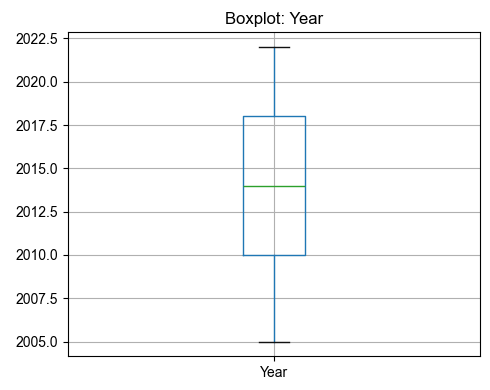

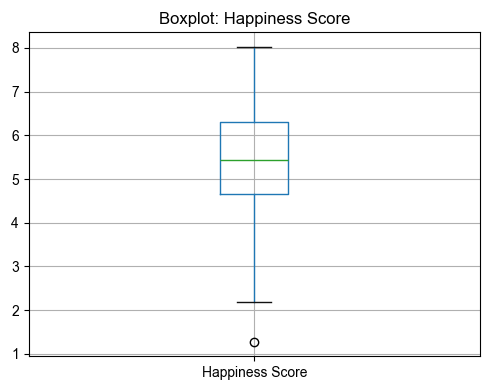

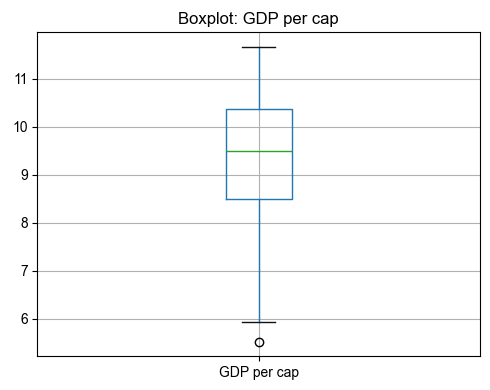

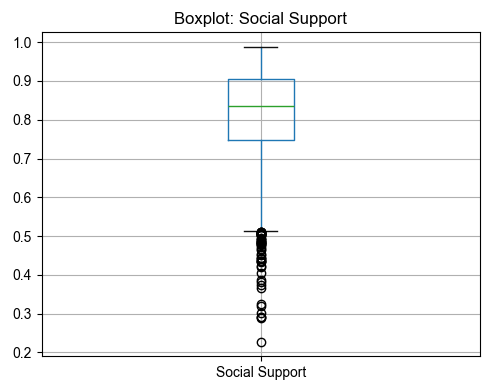

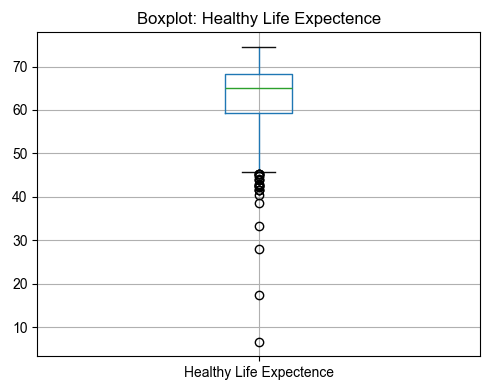

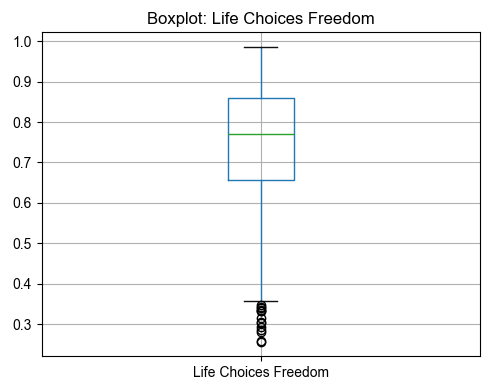

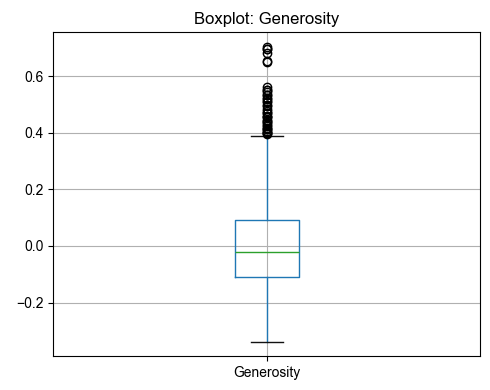

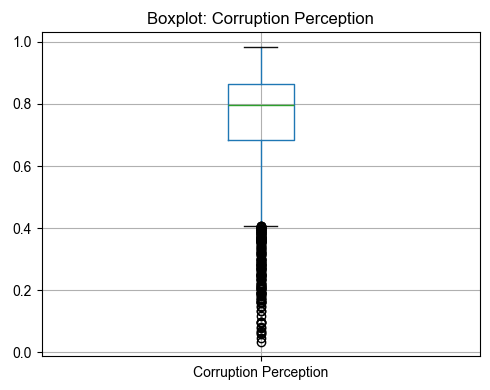

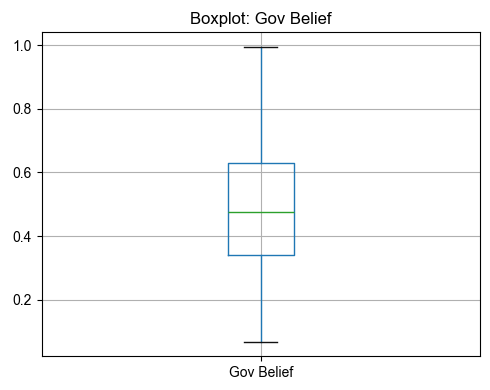

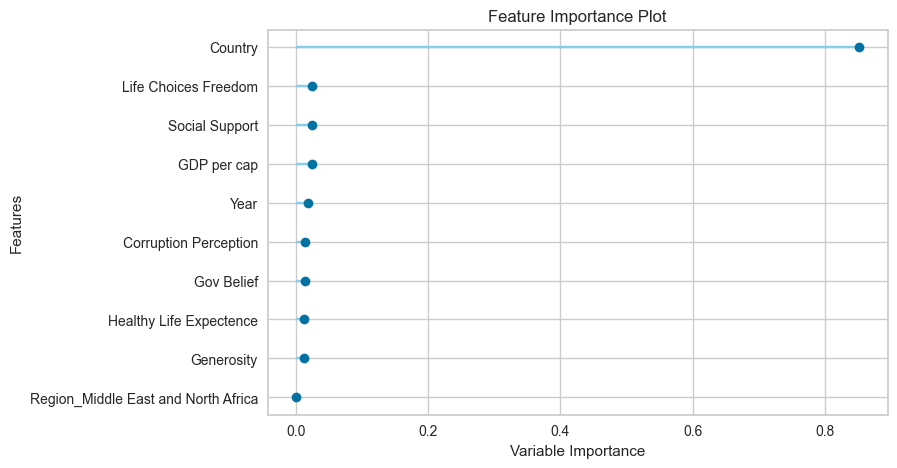

In [ ]:
# tworzymy setup dla PyCareta
from pycaret.regression import RegressionExperiment

exp = RegressionExperiment()

exp.setup(
    data=whr_processed_v3_df,
    target='Happiness Score',
    categorical_features=['Country', 'Region'],
    numeric_features=['Year'],
    session_id=123
)

# Tworzymy model lasu losowego, który może dobrze się nadać do naszego zadania (wg AI)
rf_model = exp.create_model('rf')

# Sprawdzamy jakie cechy kluczowe
exp.plot_model(rf_model, plot='feature')


 MAE, MSE i RSME nie są najmniejsze, ale kluczowe dla nas R2 osiągnęło całkiem przyzwoity wynik. Jako że badamy World Happiness Index, niewielkie błędy w przewidywaniach są dopuszczalne. Zobaczymy później jak model sprawdzi się w przewidywaniu.

In [35]:
# Tunujemy model 
tuned_rf = exp.tune_model(rf_model, optimize='RMSE', n_iter=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2771,0.1324,0.3639,0.8946,0.0620,0.0553
1,0.2343,0.0934,0.3057,0.9273,0.0521,0.0469
2,0.3166,0.1804,0.4247,0.8516,0.0779,0.0685
3,0.2940,0.1550,0.3937,0.8691,0.0670,0.0584
4,0.2968,0.1633,0.4041,0.8668,0.0707,0.0616
5,0.2992,0.1684,0.4104,0.8854,0.0750,0.0630
6,0.2666,0.1220,0.3493,0.9028,0.0601,0.0534
7,0.2909,0.1433,0.3785,0.8817,0.0656,0.0587
8,0.2801,0.1492,0.3863,0.8794,0.0677,0.0567


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Oryginał lepszy. Więc zostawiamy go i finalizujemy trenując na nieznanych dla niego danych.

In [36]:
whr_final_model = exp.finalize_model(rf_model)

In [37]:
whr_final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Year'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Country', 'Region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Region'],
                                    transformer=OneHotEncoder(cols=['Region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('rest_encoding',
                 TransformerWrapper(include=['Country'],
                                    transformer=TargetEncoder(cols=['Country'],
                                                              handle_missing='return_nan'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 RandomForestRegressor(n_jobs=-1, random_state=123))])

Zapisujemy model (to w moim przypadku będzie wersja nr 2, final)

In [42]:
exp.save_model(whr_final_model, 'whr_prediction_model_final') 

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Year'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Country', 'Region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Region'],
                                     transformer=OneHotEncoder(cols=['Region'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('rest_encoding',
                  TransformerWrapper(include=['Country'],
                                     transformer=TargetEncoder(cols=['Country'],
                                                               handle_m

Mamy plik lokalnie zapisany, teraz zapisujemy w chmurze

In [43]:
import boto3
import os
from dotenv import load_dotenv

In [44]:
load_dotenv()

# Pobieranie danych 
access_key = os.getenv('AWS_ACCESS_KEY')
secret_key = os.getenv('AWS_SECRET_KEY')
endpoint = f"https://projectpiob.fra1.digitaloceanspaces.com"

BUCKET_NAME = 'projectpiob'

# Tworzenie klienta
s3 = boto3.client(
    "s3",
    aws_access_key_id=access_key,
    aws_secret_access_key=secret_key,
    endpoint_url=endpoint
)

# Plik do wysłania
model_lokalny = "whr_prediction_model_final.pkl"
sciezka_na_spaces = "models/whr_prediction_model_final.pkl"  

# Wyślij plik
s3.upload_file(model_lokalny, BUCKET_NAME, sciezka_na_spaces)

I testujemy działanie w naszej aplikacji (w streamlit)